In [1]:
#Import code from last time
%run NI4-1.ipynb

         Current function value: 1.309578
         Iterations: 47
         Function evaluations: 74
         Gradient evaluations: 62


NI4-1.ipynb:37: RuntimeWarning: overflow encountered in square
  "        self.W1 = W1\n",
NI4-1.ipynb:37: RuntimeWarning: invalid value encountered in true_divide
  "        self.W1 = W1\n",
NI4-1.ipynb:37: RuntimeWarning: overflow encountered in square
  "        self.W1 = W1\n",
NI4-1.ipynb:37: RuntimeWarning: invalid value encountered in true_divide
  "        self.W1 = W1\n",


<Figure size 640x480 with 1 Axes>

ValueError: operands could not be broadcast together with shapes (48,1) (46,1) 

In [2]:
testX

array([[0.44281211, 0.85846731, 0.70258153, 0.6646853 ],
       [0.49627058, 0.70258153, 0.6646853 , 0.38417609],
       [0.47546339, 0.6646853 , 0.38417609, 0.50844449],
       [0.55155979, 0.38417609, 0.50844449, 0.70605062],
       [0.50099435, 0.50844449, 0.70605062, 0.62566313],
       [0.44545859, 0.70605062, 0.62566313, 0.31006745],
       [0.50571167, 0.62566313, 0.31006745, 0.71815185],
       [0.46588904, 0.31006745, 0.71815185, 0.58129533],
       [0.46785659, 0.71815185, 0.58129533, 0.59084039],
       [0.45300142, 0.58129533, 0.59084039, 0.64112187],
       [0.43741172, 0.59084039, 0.64112187, 0.70009636],
       [0.3506737 , 0.64112187, 0.70009636, 0.61497185],
       [0.36403131, 0.70009636, 0.61497185, 0.591378  ]])

In [3]:
testY

array([[0.38417609],
       [0.50844449],
       [0.70605062],
       [0.62566313],
       [0.31006745],
       [0.71815185],
       [0.58129533],
       [0.59084039],
       [0.64112187],
       [0.70009636],
       [0.61497185],
       [0.591378  ],
       [0.32      ]])

In [4]:
trainX

array([[0.11211342, 0.42336055, 0.31155855, 0.42299539],
       [0.17073406, 0.31155855, 0.42299539, 0.42478065],
       [0.2232566 , 0.42299539, 0.42478065, 0.32205711],
       [0.24197469, 0.42478065, 0.32205711, 0.46046559],
       [0.36573346, 0.32205711, 0.46046559, 0.16668864],
       [0.55255899, 0.46046559, 0.16668864, 0.40174469],
       [0.37002352, 0.16668864, 0.40174469, 0.31647817],
       [0.3325317 , 0.40174469, 0.31647817, 0.27086271],
       [0.38788752, 0.31647817, 0.27086271, 0.31251205],
       [0.39836394, 0.27086271, 0.31251205, 0.36909266],
       [0.2848263 , 0.31251205, 0.36909266, 0.20575138],
       [0.18673502, 0.36909266, 0.20575138, 0.17619313],
       [0.18269477, 0.20575138, 0.17619313, 0.29041944],
       [0.255617  , 0.17619313, 0.29041944, 0.24090886],
       [0.23597043, 0.29041944, 0.24090886, 0.27408835],
       [0.16413413, 0.24090886, 0.27408835, 0.37090835],
       [0.17817663, 0.27408835, 0.37090835, 0.05869047],
       [0.1639561 , 0.37090835,

In [5]:
trainY

array([[0.31155855],
       [0.42299539],
       [0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.664

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 4
        self.outputLayerSize = 1
        self.hiddenLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

6.647505149680817e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.019265
         Iterations: 68
         Function evaluations: 75
         Gradient evaluations: 75


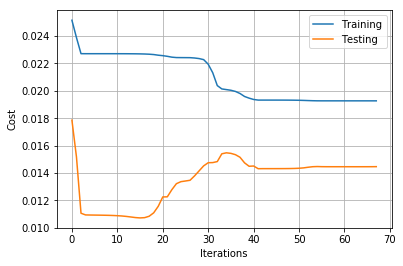

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02515328]),
 array([0.02388585]),
 array([0.02271133]),
 array([0.02270916]),
 array([0.02270914]),
 array([0.02270913]),
 array([0.02270909]),
 array([0.02270903]),
 array([0.02270891]),
 array([0.02270869]),
 array([0.02270828]),
 array([0.02270754]),
 array([0.02270628]),
 array([0.02270421]),
 array([0.02270091]),
 array([0.02269556]),
 array([0.02268671]),
 array([0.02267207]),
 array([0.02264708]),
 array([0.02259987]),
 array([0.02256616]),
 array([0.0225178]),
 array([0.02245641]),
 array([0.02242692]),
 array([0.02242364]),
 array([0.022422]),
 array([0.02241889]),
 array([0.0223948]),
 array([0.02235346]),
 array([0.022276]),
 array([0.02194129]),
 array([0.02131619]),
 array([0.02037994]),
 array([0.02013539]),
 array([0.02008679]),
 array([0.0200377]),
 array([0.01995188]),
 array([0.01980214]),
 array([0.01958397]),
 array([0.01946246]),
 array([0.01936569]),
 array([0.01932027]),
 array([0.01932022]),
 array([0.0193202]),
 array([0.01932]),
 array([0.01931966]),

In [17]:
T.testJ

[array([0.01785529]),
 array([0.01517037]),
 array([0.01105512]),
 array([0.01093108]),
 array([0.01092422]),
 array([0.01091939]),
 array([0.01091457]),
 array([0.01090888]),
 array([0.01090137]),
 array([0.0108908]),
 array([0.01087544]),
 array([0.01085296]),
 array([0.01082103]),
 array([0.01077965]),
 array([0.01073698]),
 array([0.01071256]),
 array([0.01073199]),
 array([0.01083404]),
 array([0.01108411]),
 array([0.01155935]),
 array([0.01224465]),
 array([0.01225368]),
 array([0.01277602]),
 array([0.01321346]),
 array([0.01336105]),
 array([0.01340957]),
 array([0.01346166]),
 array([0.01378556]),
 array([0.01414956]),
 array([0.01451635]),
 array([0.01474391]),
 array([0.01475451]),
 array([0.01482826]),
 array([0.01539677]),
 array([0.01546856]),
 array([0.01542849]),
 array([0.01533129]),
 array([0.01514351]),
 array([0.01473621]),
 array([0.01448592]),
 array([0.01450412]),
 array([0.0143074]),
 array([0.01431215]),
 array([0.01431215]),
 array([0.01431236]),
 array([0.01

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.007476357005284308

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.41132553],
       [0.41319376],
       [0.42691216],
       [0.42158838],
       [0.41055051],
       [0.41096219],
       [0.38009529],
       [0.40633949],
       [0.38620338],
       [0.39077422],
       [0.39049389],
       [0.35784645],
       [0.31705243],
       [0.33959755],
       [0.36010171],
       [0.36153275],
       [0.36085022],
       [0.34440096],
       [0.33346902],
       [0.39898751],
       [0.39174281],
       [0.41759011],
       [0.43265458],
       [0.41798729],
       [0.40676611],
       [0.41917507],
       [0.44020375],
       [0.4233471 ],
       [0.4207813 ],
       [0.41689901],
       [0.46036784],
       [0.4561333 ],
       [0.46550977],
       [0.47893914],
       [0.48366361],
       [0.48303175],
       [0.47994313],
       [0.48018528],
       [0.4889844 ],
       [0.49067164],
       [0.48659962],
       [0.48645   ],
       [0.49570855],
       [0.49198137],
       [0.49244369],
       [0.49459236],
       [0.49029353],
       [0.480

In [21]:
y

array([[0.42478065],
       [0.32205711],
       [0.46046559],
       [0.16668864],
       [0.40174469],
       [0.31647817],
       [0.27086271],
       [0.31251205],
       [0.36909266],
       [0.20575138],
       [0.17619313],
       [0.29041944],
       [0.24090886],
       [0.27408835],
       [0.37090835],
       [0.05869047],
       [0.40032459],
       [0.28999341],
       [0.30771415],
       [0.42915251],
       [0.44062484],
       [0.35804636],
       [0.2957245 ],
       [0.4914135 ],
       [0.35624081],
       [0.54105594],
       [0.15752904],
       [0.55294416],
       [0.51433788],
       [0.44121317],
       [0.58940001],
       [0.67707055],
       [0.67615763],
       [0.69694172],
       [0.58293858],
       [0.61114774],
       [0.7834559 ],
       [0.93566973],
       [0.28699092],
       [1.        ],
       [0.84997718],
       [0.62600801],
       [0.93614647],
       [0.85846731],
       [0.70258153],
       [0.6646853 ],
       [0.38417609],
       [0.508

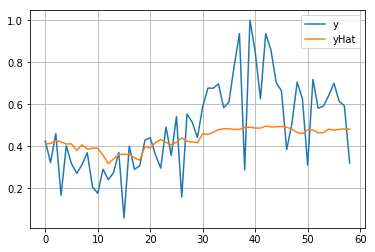

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.47525534],
       [0.46476851],
       [0.444469  ],
       [0.42662457]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.50	]	,
[	0.415539889	]	,
[	0	]	,
[	0.235502358	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.05927903750413257

In [27]:
dataprediksi

array([[0.79538041, 0.61497185, 0.591378  , 0.32      ],
       [1.        , 0.591378  , 0.32      , 0.5       ],
       [0.70768171, 0.32      , 0.5       , 0.41553989],
       [0.49169532, 0.5       , 0.41553989, 0.        ]])

In [ ]:
z=np.array([0.51319034])

In [ ]:
y=np.array([0.415539889	,	0	,	0.235502358	])

In [ ]:
a=np.concatenate((z,y))

In [ ]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

In [ ]:
#prediksi 2
c=prediksi
z1=np.array([0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 3
c=prediksi
z2=np.array([0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 4
c=prediksi
z3=np.array([0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 5
c=prediksi
z4=np.array([0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 6
c=prediksi
z5=np.array([0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi